In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
sns.set()

In [119]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/fetal-health-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fetal-health-classification


In [120]:
df = pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [121]:
df.shape

(2126, 22)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [123]:
df.apply(pd.isnull).sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [124]:
df.duplicated().sum()

13

In [125]:
df.drop_duplicates(inplace = True)

In [126]:
df.shape

(2113, 22)

In [127]:
df.reset_index(drop = True, inplace = True)

In [128]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [129]:
df['fetal_health'].value_counts()

fetal_health
1.0    1646
2.0     292
3.0     175
Name: count, dtype: int64

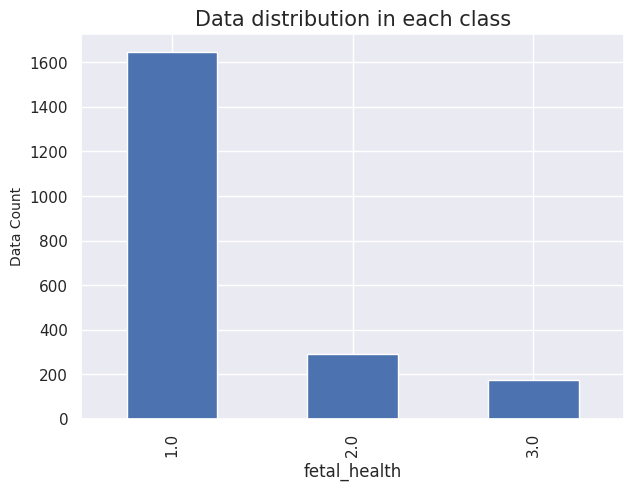

In [130]:
df['fetal_health'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution in each class', fontsize = 15)
plt.ylabel('Data Count', fontsize = 10)
plt.show()

In [131]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [132]:
df.corr()['fetal_health'].sort_values(ascending = False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.486752
abnormal_short_term_variability                           0.469671
percentage_of_time_with_abnormal_long_term_variability    0.421634
histogram_variance                                        0.208171
baseline value                                            0.146077
severe_decelerations                                      0.132408
fetal_movement                                            0.088057
histogram_min                                             0.063529
light_decelerations                                       0.059651
histogram_number_of_zeroes                               -0.016376
histogram_number_of_peaks                                -0.022856
histogram_max                                            -0.046480
histogram_width                                          -0.069529
mean_value_of_short_term_variability                     -0.10

In [133]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,...,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504,1.303833
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,...,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075,0.614279
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [134]:
df['fetal_health'] = df['fetal_health'].replace({
    1.0: 0,
    2.0: 1,
    3.0: 2
})

In [135]:
df['fetal_health'].value_counts()

fetal_health
0.0    1646
1.0     292
2.0     175
Name: count, dtype: int64

In [136]:
df['fetal_health'] = df['fetal_health'].astype('int32')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,1
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0


In [137]:
X = df.drop(columns = ['fetal_health'], axis = 1)
y = df['fetal_health']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle = True,
                                                   stratify = y)

In [139]:
print('The number of data in training dataset is:', X_train.shape[0])
print('The number of data in test dataset is:', X_test.shape[0])

The number of data in training dataset is: 1690
The number of data in test dataset is: 423


In [140]:
scaler = StandardScaler()

In [141]:
X_train_scaled = scaler.fit_transform(X_train)

In [142]:
X_test_scaled = scaler.transform(X_test)

In [143]:
k = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [144]:
accuracy = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i, p = 3, metric = 'euclidean')
    cvs = cross_val_score(knn, X_train_scaled, y_train, cv = 5)
    accuracy.append(cvs.mean())

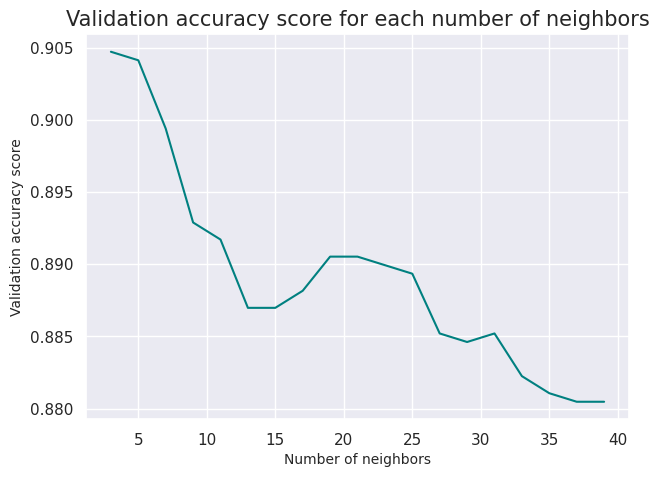

In [145]:
plt.figure(figsize = (7, 5))
plt.plot(k, accuracy, color = 'teal')
plt.title('Validation accuracy score for each number of neighbors', fontsize = 15)
plt.xlabel('Number of neighbors', fontsize = 10)
plt.ylabel('Validation accuracy score', fontsize = 10)
plt.show()

In [146]:
model = KNeighborsClassifier(n_neighbors = 3, p = 3, metric = 'euclidean')

In [147]:
model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, p=3)

In [148]:
y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       330
           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00        35

    accuracy                           0.78       423
   macro avg       0.26      0.33      0.29       423
weighted avg       0.61      0.78      0.68       423



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


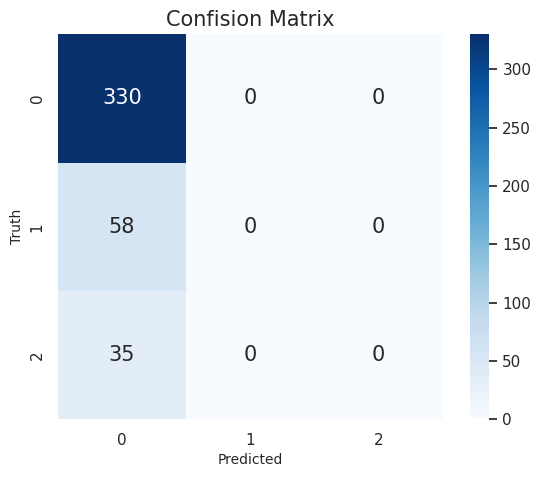

In [154]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confision Matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [156]:
smote = SMOTE(sampling_strategy = 'not majority')

In [157]:
X_sm, y_sm = smote.fit_resample(X_train_scaled, y_train)

In [158]:
len(X_sm)

3948

In [159]:
X_sm_test, y_sm_test = smote.fit_resample(X_test_scaled, y_test)

In [161]:
len(X_sm_test)

990

In [162]:
accuracy2 = []
for i in k:
    knn2 = KNeighborsClassifier(n_neighbors = i, p = 3, metric = 'euclidean')
    cvs2 = cross_val_score(knn2, X_sm, y_sm, cv = 5)
    accuracy2.append(cvs2.mean())

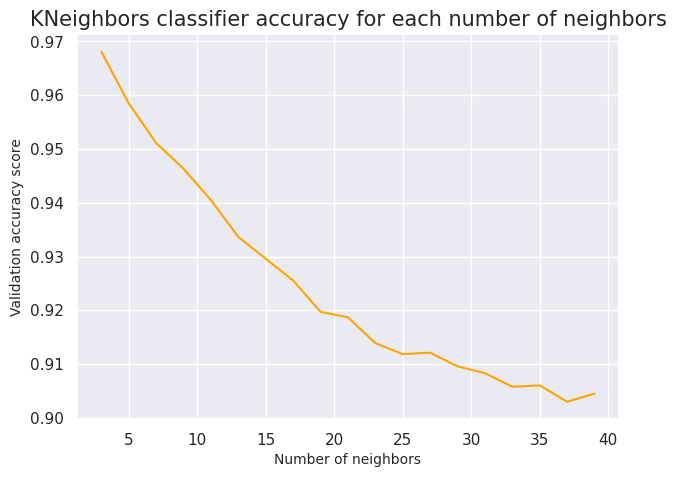

In [163]:
plt.figure(figsize = (7, 5))
plt.plot(k, accuracy2, color = 'orange')
plt.title('KNeighbors classifier accuracy for each number of neighbors', fontsize = 15)
plt.xlabel('Number of neighbors', fontsize = 10)
plt.ylabel('Validation accuracy score', fontsize = 10)
plt.show()

In [165]:
model2 = KNeighborsClassifier(n_neighbors = 3, p = 3, metric = 'euclidean')

In [166]:
model2.fit(X_sm, y_sm)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, p=3)

In [167]:
y_pred2 = model2.predict(X_sm_test)

In [169]:
print(classification_report(y_sm_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       330
           1       0.80      0.80      0.80       330
           2       0.90      0.87      0.88       330

    accuracy                           0.86       990
   macro avg       0.86      0.86      0.86       990
weighted avg       0.86      0.86      0.86       990



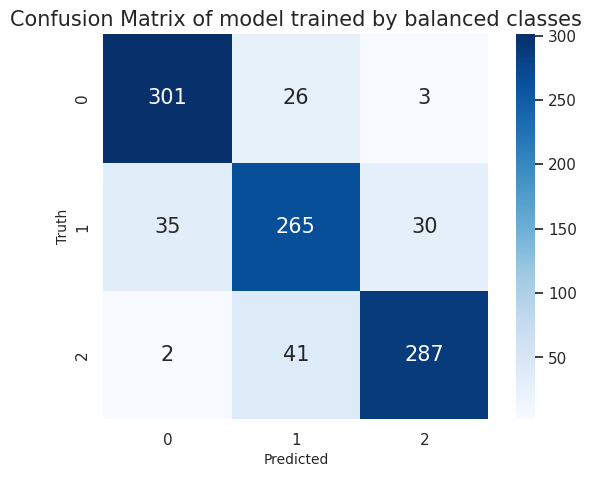

In [170]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_sm_test, y_pred2), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix of model trained by balanced classes', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()